In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


##Import Module 

In [2]:
# importing dependecies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score







**##**Loading Dataset

In [3]:
train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [4]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [5]:
test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [6]:
# statistical info
train.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [7]:
# test
test.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,6548.000000,6544.000000,6543.000000,6524.000000,6541.000000,6536.000000,6533.000000,6548.000000,6554.000000,6554.000000,6537.000000,6541.000000,6552.000000,6531.000000,6541.000000
mean,2.283293,76.994609,0.494727,32.907760,30.742088,1151.231143,0.022392,0.043874,4.982108,0.064297,2.134006,2.357743,3.184676,4.041954,0.227947
std,3.345387,168.679695,1.272524,134.683314,43.539549,1917.250309,0.048374,0.048290,17.635847,0.202678,0.909340,1.721375,2.407328,4.027747,0.419540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,172.127778,0.000000,0.014543,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,4.875000,0.000000,0.000000,17.000000,570.341614,0.003165,0.026458,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.000000,0.000000,0.000000,37.000000,1425.750000,0.017778,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,26.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [8]:
# datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

Exploratory data Analysis 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OS', ylabel='count'>

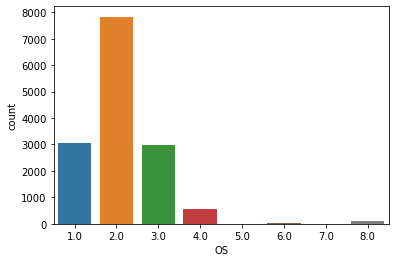

In [9]:
sns.countplot(train['OS'])

In [10]:
# checking for missing values 

train.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [11]:
test.isnull().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
Month_SeasonalPurchase             58
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
CustomerType                       88
Gender                             64
Cookies Setting                    62
Education                          69
Marital Status                     47
WeekendPurchase                    58
dtype: int64

In [12]:
#Handling missing value 
# replace numerical value with mean
# catogerical value with mode 

In [13]:

# handling 'Homepage' column
train['HomePage'].fillna(train['HomePage'].mean(),inplace=True)
# Handling 'HomePage_Duration' column
train['HomePage_Duration'].fillna(train['HomePage_Duration'].mean(),inplace=True)
# 'LandingPage'
train['LandingPage'].fillna(train['LandingPage'].mean(),inplace=True)
# 'LandingPage_Duration' 
train['LandingPage_Duration'].fillna(train['LandingPage_Duration'].mean(),inplace=True)
# 'ProductDescriptionPage'
#train['ProductDescriptionPage'].fillna(train['ProductDesriptionPage'].mean(),inplace=True)
# 'ProductDescriptionPage_Duration'
#train['ProductDescriptionPage_Duration'].fillna(train['ProductDesriptionPage_Duration'].mean(),inplace=True)
# 'GoogleMetric:Bounce Rates'
train['GoogleMetric:Bounce Rates'].fillna(train['GoogleMetric:Bounce Rates'].mean(),inplace=True)
# 'GoogleMetric:Exit Rates'
train['GoogleMetric:Exit Rates'].fillna(train['GoogleMetric:Exit Rates'].mean(),inplace=True)
# 'GoogleMetric:Page Values '
train['GoogleMetric:Page Values'].fillna(train['GoogleMetric:Page Values'].mean(),inplace=True)
#  'SeasonalPurchase'
train['SeasonalPurchase'].fillna(train['SeasonalPurchase'].mean(),inplace=True)
# 'SearchEngine'
train['SearchEngine'].fillna(train['SearchEngine'].mean(),inplace=True)
# 'OS'
train['OS'].fillna(train['OS'].mean(),inplace=True)
# 'Zone' 
train['Zone'].fillna(train['Zone'].mean(),inplace=True)
# 'Type of Traffic'
train['Type of Traffic'].fillna(train['Type of Traffic'].mean(),inplace=True)
# 'WeekendPurchase'
train['WeekendPurchase'].fillna(train['WeekendPurchase'].mean(),inplace=True)



In [14]:
# handling 'Homepage' column
test['HomePage'].fillna(test['HomePage'].mean(),inplace=True)
# Handling 'HomePage_Duration' column
test['HomePage_Duration'].fillna(test['HomePage_Duration'].mean(),inplace=True)
# 'LandingPage'
test['LandingPage'].fillna(test['LandingPage'].mean(),inplace=True)
# 'LandingPage_Duration' 
test['LandingPage_Duration'].fillna(test['LandingPage_Duration'].mean(),inplace=True)
# 'ProductDescriptionPage'
#train['ProductDescriptionPage'].fillna(train['ProductDesriptionPage'].mean(),inplace=True)
# 'ProductDescriptionPage_Duration'
#train['ProductDescriptionPage_Duration'].fillna(train['ProductDesriptionPage_Duration'].mean(),inplace=True)
# 'GoogleMetric:Bounce Rates'
test['GoogleMetric:Bounce Rates'].fillna(test['GoogleMetric:Bounce Rates'].mean(),inplace=True)
# 'GoogleMetric:Exit Rates'
test['GoogleMetric:Exit Rates'].fillna(test['GoogleMetric:Exit Rates'].mean(),inplace=True)
# 'GoogleMetric:Page Values '
test['GoogleMetric:Page Values'].fillna(test['GoogleMetric:Page Values'].mean(),inplace=True)
#  'SeasonalPurchase'
test['SeasonalPurchase'].fillna(test['SeasonalPurchase'].mean(),inplace=True)
# 'SearchEngine'
test['SearchEngine'].fillna(test['SearchEngine'].mean(),inplace=True)
# 'OS'
test['OS'].fillna(test['OS'].mean(),inplace=True)
# 'Zone' 
test['Zone'].fillna(test['Zone'].mean(),inplace=True)
# 'Type of Traffic'
test['Type of Traffic'].fillna(test['Type of Traffic'].mean(),inplace=True)
# 'WeekendPurchase'
test['WeekendPurchase'].fillna(test['WeekendPurchase'].mean(),inplace=True)



In [15]:
a = train['Month_SeasonalPurchase'].mode()
a

0    May
dtype: object

In [16]:
# categorical data 
# 'Month_SeasonalPurchase'
a = train['Month_SeasonalPurchase'].mode()
train['Month_SeasonalPurchase'].fillna('a',inplace=True)
# 'CustomerType'
b = train['CustomerType'].mode()
train['CustomerType'].fillna('b',inplace=True)
# 'Gender'
c = train['Gender'].mode()
train['Gender'].fillna('c',inplace=True)
# 'Cookies Setting'
d = train['Cookies Setting'].mode()
train['Cookies Setting'].fillna('d',inplace=True)
# 'Education'
e = train['Education'].mode()
train['Education'].fillna('e',inplace=True)
# 'Marital Status'
f = train['Marital Status'].mode()
train['Marital Status'].fillna('f',inplace=True)




In [17]:
# categorical data 
# 'Month_SeasonalPurchase'
a = test['Month_SeasonalPurchase'].mode()
test['Month_SeasonalPurchase'].fillna('a',inplace=True)
# 'CustomerType'
b = test['CustomerType'].mode()
test['CustomerType'].fillna('b',inplace=True)
# 'Gender'
c = test['Gender'].mode()
test['Gender'].fillna('c',inplace=True)
# 'Cookies Setting'
d = test['Cookies Setting'].mode()
test['Cookies Setting'].fillna('d',inplace=True)
# 'Education'
e = test['Education'].mode()
test['Education'].fillna('e',inplace=True)
# 'Marital Status'
f = test['Marital Status'].mode()
test['Marital Status'].fillna('f',inplace=True)



In [18]:
# Removing two column 
train = train.drop(labels=['ProductDescriptionPage','ProductDescriptionPage_Duration'],axis=1)

In [19]:
# Removing two column 
test = test.drop(labels=['ProductDescriptionPage','ProductDescriptionPage_Duration'],axis=1)

In [20]:
train.isnull().sum()

HomePage                     0
HomePage_Duration            0
LandingPage                  0
LandingPage_Duration         0
GoogleMetric:Bounce Rates    0
GoogleMetric:Exit Rates      0
GoogleMetric:Page Values     0
SeasonalPurchase             0
Month_SeasonalPurchase       0
OS                           0
SearchEngine                 0
Zone                         0
Type of Traffic              0
CustomerType                 0
Gender                       0
Cookies Setting              0
Education                    0
Marital Status               0
WeekendPurchase              0
Made_Purchase                0
dtype: int64

In [21]:
test.isnull().sum()

HomePage                     0
HomePage_Duration            0
LandingPage                  0
LandingPage_Duration         0
GoogleMetric:Bounce Rates    0
GoogleMetric:Exit Rates      0
GoogleMetric:Page Values     0
SeasonalPurchase             0
Month_SeasonalPurchase       0
OS                           0
SearchEngine                 0
Zone                         0
Type of Traffic              0
CustomerType                 0
Gender                       0
Cookies Setting              0
Education                    0
Marital Status               0
WeekendPurchase              0
dtype: int64

In [22]:
# data type 
train.dtypes


HomePage                     float64
HomePage_Duration            float64
LandingPage                  float64
LandingPage_Duration         float64
GoogleMetric:Bounce Rates    float64
GoogleMetric:Exit Rates      float64
GoogleMetric:Page Values     float64
SeasonalPurchase             float64
Month_SeasonalPurchase        object
OS                           float64
SearchEngine                 float64
Zone                         float64
Type of Traffic              float64
CustomerType                  object
Gender                        object
Cookies Setting               object
Education                     object
Marital Status                object
WeekendPurchase              float64
Made_Purchase                   bool
dtype: object

In [23]:
test.dtypes

HomePage                     float64
HomePage_Duration            float64
LandingPage                  float64
LandingPage_Duration         float64
GoogleMetric:Bounce Rates    float64
GoogleMetric:Exit Rates      float64
GoogleMetric:Page Values     float64
SeasonalPurchase             float64
Month_SeasonalPurchase        object
OS                           float64
SearchEngine                 float64
Zone                         float64
Type of Traffic              float64
CustomerType                  object
Gender                        object
Cookies Setting               object
Education                     object
Marital Status                object
WeekendPurchase              float64
dtype: object

Label Encoding 

In [24]:
encoder = LabelEncoder()


In [25]:
# 'Month_SeasonalPurchase'
train['Month_SeasonalPurchase'] = encoder.fit_transform(train['Month_SeasonalPurchase'])
# 'CustomerType'
train['CustomerType'] = encoder.fit_transform(train['CustomerType'])
#  'Gender'
train['Gender'] = encoder.fit_transform(train['Gender'])
# 'Cookies Setting'
train['Cookies Setting'] = encoder.fit_transform(train['Cookies Setting'])
#  'Education'
train['Education'] = encoder.fit_transform(train['Education'])
# 'Marital Status'
train['Marital Status'] = encoder.fit_transform(train['Marital Status'])
# 'Made Purchase'
train['Made_Purchase'] = encoder.fit_transform(train['Made_Purchase'])


In [26]:
# 'Month_SeasonalPurchase'
test['Month_SeasonalPurchase'] = encoder.fit_transform(test['Month_SeasonalPurchase'])
# 'CustomerType'
test['CustomerType'] = encoder.fit_transform(test['CustomerType'])
#  'Gender'
test['Gender'] = encoder.fit_transform(test['Gender'])
# 'Cookies Setting'
test['Cookies Setting'] = encoder.fit_transform(test['Cookies Setting'])
#  'Education'
test['Education'] = encoder.fit_transform(test['Education'])
# 'Marital Status'
test['Marital Status'] = encoder.fit_transform(test['Marital Status'])


Splitting into testing data 

In [27]:
X = train.drop(columns='Made_Purchase', axis=1)
Y = train['Made_Purchase']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Feature Scaling 

In [29]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

Machine Learning Model Training 

In [30]:
#from sklearn.svm import SVC # "Support vector classifier"  
#model = SVC(kernel='linear', random_state=2) 

#model = LogisticRegression()

In [31]:
#from sklearn.tree import DecisionTreeClassifier  
#model = DecisionTreeClassifier(criterion='entropy', random_state=2)  

In [32]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()

In [33]:
model.fit(X_train, Y_train)



RidgeClassifier()

In [34]:
# prediction on training data

prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [35]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.6527494908350305


In [36]:
# prediction on test data

prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [37]:
prediction_on_test_data

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.6430268069222939


model training on complete data 

In [39]:

model.fit(X,Y)

RidgeClassifier()

In [40]:
pred =  model.predict(test)
pred

array([0, 0, 0, ..., 0, 0, 0])

Test Submission 

In [41]:
# Test Submission 
sub = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv')
sub.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [42]:
sub['Made_Purchase'] = pred

In [43]:
sub.head()

,id,Made_Purchase
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [44]:
sub.to_csv('submission.csv',index=False)